In [1]:
# UPS Aircraft Incident Analysis
# Author: Diana Zamora"
# GitHub Repo: https://github.com/DrZamora01/FlightRisk-UPSAnalysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/processed/UPS_Incidents_Cleaned.csv")

In [3]:
df.head()

,AIDS Report Number,Local Event Date,Event City,Event State,Event Airport,Event Type,Aircraft Damage,Flight Phase,Aircraft Make,Aircraft Model,...,Total Fatalities,Total Injuries,Aircraft Engine Make,Aircraft Engine Model,Engine Group Code,Nbr of Engines,PIC Certificate Type,PIC Flight Time Total Hrs,PIC Flight Time Total Make-Model,AircraftType
0,20010608013749I,08-JUN-01,NEWARK,NJ,NEWARK LIBERTY INTL,INCIDENT,MINOR,LEVEL OFF TOUCHDOWN,AIRBUS,A300,...,0,0,PWA,PW4158,4158,2.0,NaN,NaN,NaN,Airbus
1,20080516833729I,16-MAY-08,OMAHA,NE,EPPLEY AIRFIELD,INCIDENT,NONE,NORMAL CRUISE,AIRBUS,A300,...,0,0,PWA,PW4158,4158,2.0,NaN,0.0,0.0,Airbus
2,20090316002799I,16-MAR-09,ALBUQUERQUE,NM,ALBUQUERQUE INTL SUNPORT,INCIDENT,MINOR,LANDING,AIRBUS,A300,...,0,0,NaN,NaN,NaN,2.0,NaN,0.0,0.0,Airbus
3,20090318002549I,18-MAR-09,LOUISVILLE,KY,LOUISVILLE INTL-STANDIFORD FIELD,INCIDENT,MINOR,OTHER-SPECIFY,AIRBUS,A300,...,0,0,PWA,PW4158,4158,2.0,NaN,0.0,0.0,Airbus
4,20120822020209I,22-AUG-12,LOUISVILLE,KY,LOUISVILLE INTL-STANDIFORD FIELD,INCIDENT,MINOR,DESCENT,AIRBUS,A300,...,0,0,P & W,PW4158,NaN,NaN,NaN,NaN,NaN,Airbus


### General Over of Data

In [11]:
df.describe()

,Total Fatalities,Total Injuries,Nbr of Engines,PIC Flight Time Total Hrs,PIC Flight Time Total Make-Model
count,85.0,85.0,65.000000,41.000000,40.000000
mean,0.0,0.0,2.707692,8221.707317,1949.650000
std,0.0,0.0,0.722908,5004.356338,2225.926895
min,0.0,0.0,2.000000,0.000000,0.000000
25%,0.0,0.0,2.000000,5446.000000,200.000000
50%,0.0,0.0,3.000000,9250.000000,802.500000
75%,0.0,0.0,3.000000,10800.000000,3200.000000
max,0.0,0.0,4.000000,19150.000000,8000.000000


In [12]:
df.isnull().sum()

AIDS Report Number                   0
Local Event Date                     0
Event City                           2
Event State                          2
Event Airport                        6
Event Type                           2
Aircraft Damage                     29
Flight Phase                         2
Aircraft Make                        0
Aircraft Model                       0
Aircraft Series                      0
Operator                             0
Primary Flight Type                 22
Flight Conduct Code                  0
Flight Plan Filed Code              20
Aircraft Registration Nbr            0
Total Fatalities                     0
Total Injuries                       0
Aircraft Engine Make                47
Aircraft Engine Model               47
Engine Group Code                   62
Nbr of Engines                      20
PIC Certificate Type                29
PIC Flight Time Total Hrs           44
PIC Flight Time Total Make-Model    45
AircraftType             

### Missing Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

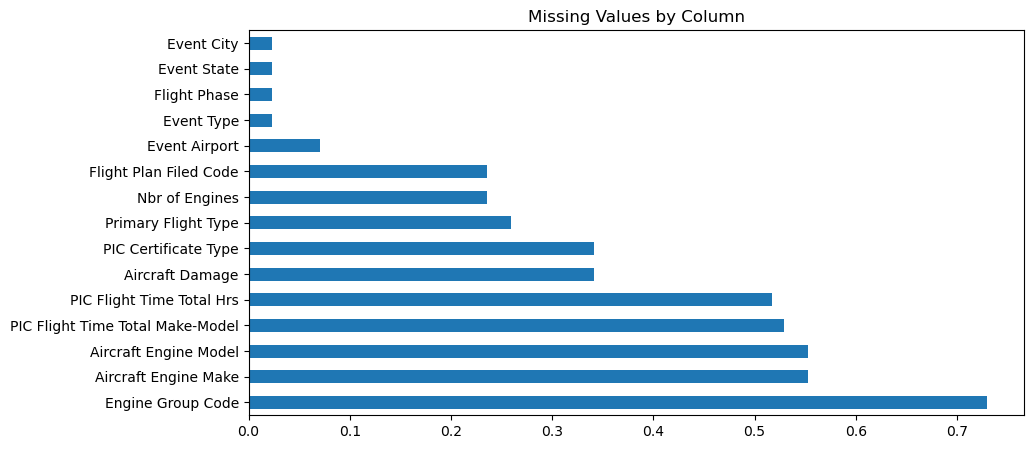

In [18]:
miss = df.isnull().mean().sort_values(ascending=False)
miss[miss > 0].plot(kind="barh", figsize=(10,5), title="Missing Values by Column")
plt.show

C:\Users\moonw\AppData\Local\Temp\ipykernel_27328\484748703.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Local Event Date"] = pd.to_datetime(df["Local Event Date"], errors="coerce")


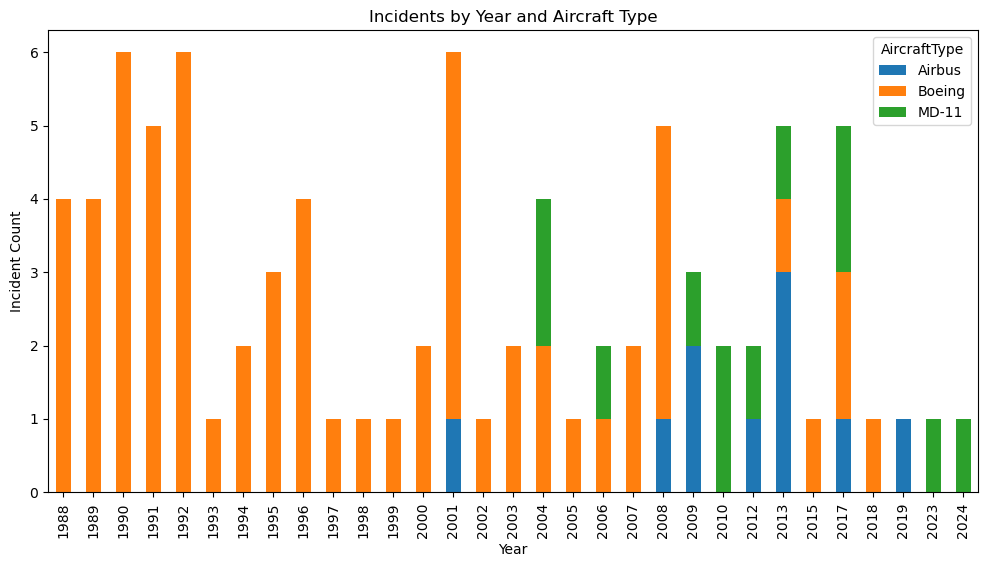

In [20]:
df["Local Event Date"] = pd.to_datetime(df["Local Event Date"], errors="coerce")
df["Year"] = df["Local Event Date"].dt.year

df.groupby(["Year", "AircraftType"]).size().unstack().plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Incidents by Year and Aircraft Type")
plt.ylabel("Incident Count")
plt.show()


In [26]:

df['Aircraft Model'].value_counts()


Aircraft Model
727     23
757     19
MD11    12
767     11
A300    10
747     10
Name: count, dtype: int64

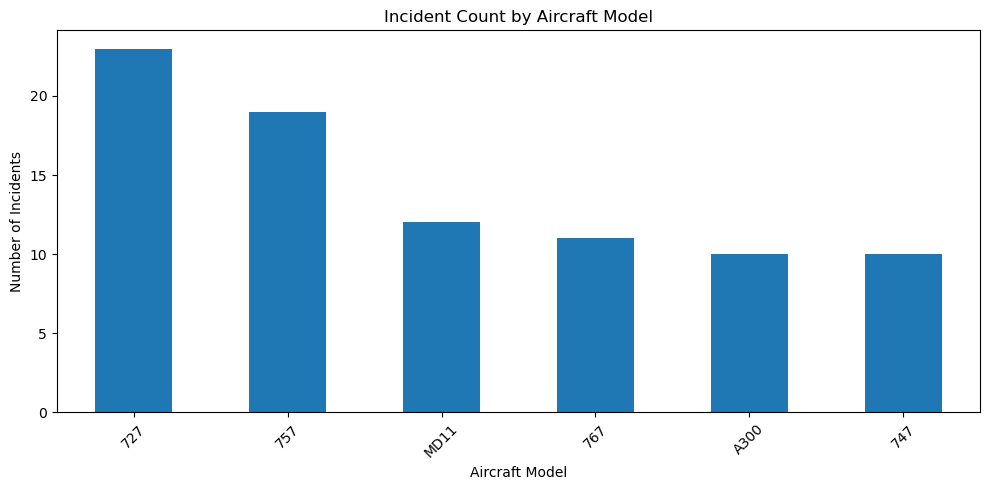

In [27]:
df['Aircraft Model'].value_counts().plot(kind='bar', figsize=(10, 5), title="Incident Count by Aircraft Model")
plt.xlabel("Aircraft Model")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Air Craft Damaged

In [28]:
df['Aircraft Damage'].value_counts()


Aircraft Damage
MINOR          39
NONE           13
SUBSTANTIAL     4
Name: count, dtype: int64

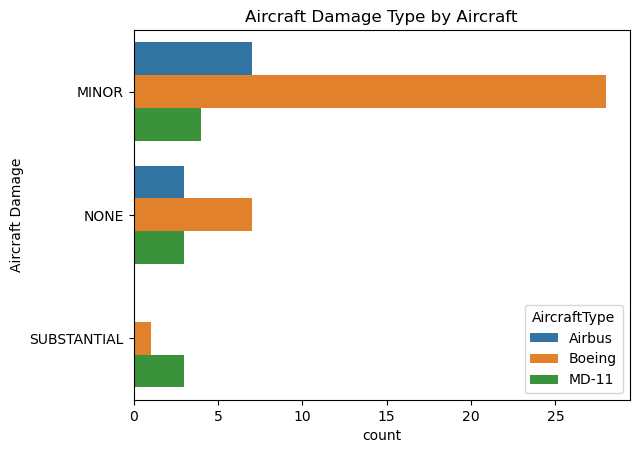

In [52]:
sns.countplot(data=df, y="Aircraft Damage", hue="AircraftType")
plt.title("Aircraft Damage Type by Aircraft")
plt.show()

In [72]:
def plot_aircraft_damage_pie(df, aircraft_type):

    filtered_df = df[df['AircraftType'] == aircraft_type]
    damage_counts = filtered_df['Aircraft Damage'].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(
        damage_counts,
        labels=damage_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops={'edgecolor': 'white'}
    )
    plt.title(f"{aircraft_type} - Damage Distribution")
    plt.tight_layout()
    plt.show()


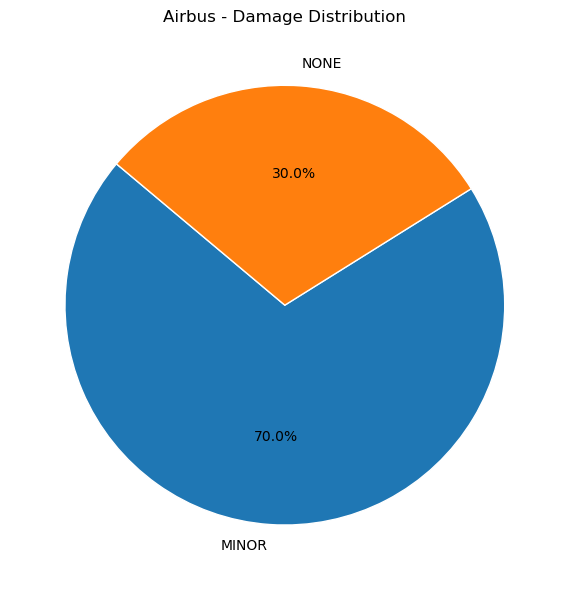

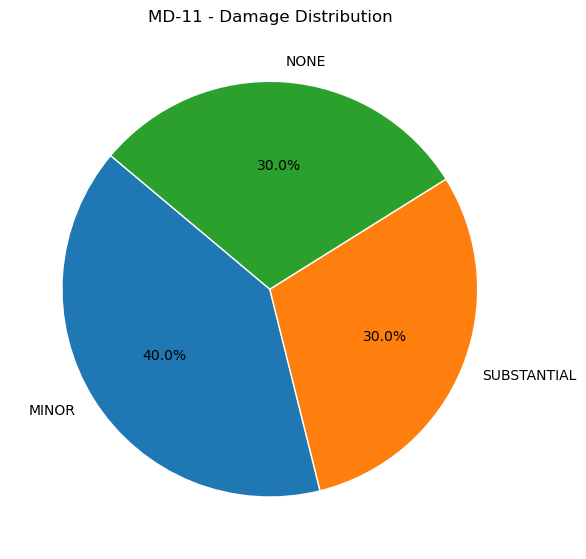

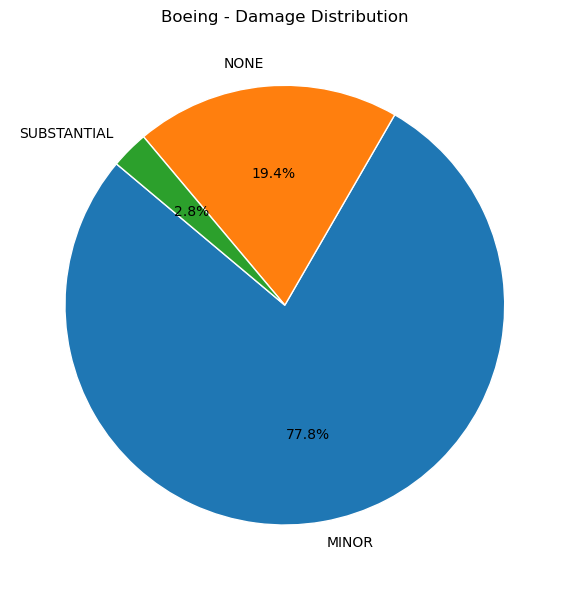

In [77]:
plot_aircraft_damage_pie(df, "Airbus")
plot_aircraft_damage_pie(df, "MD-11")
plot_aircraft_damage_pie(df, "Boeing")


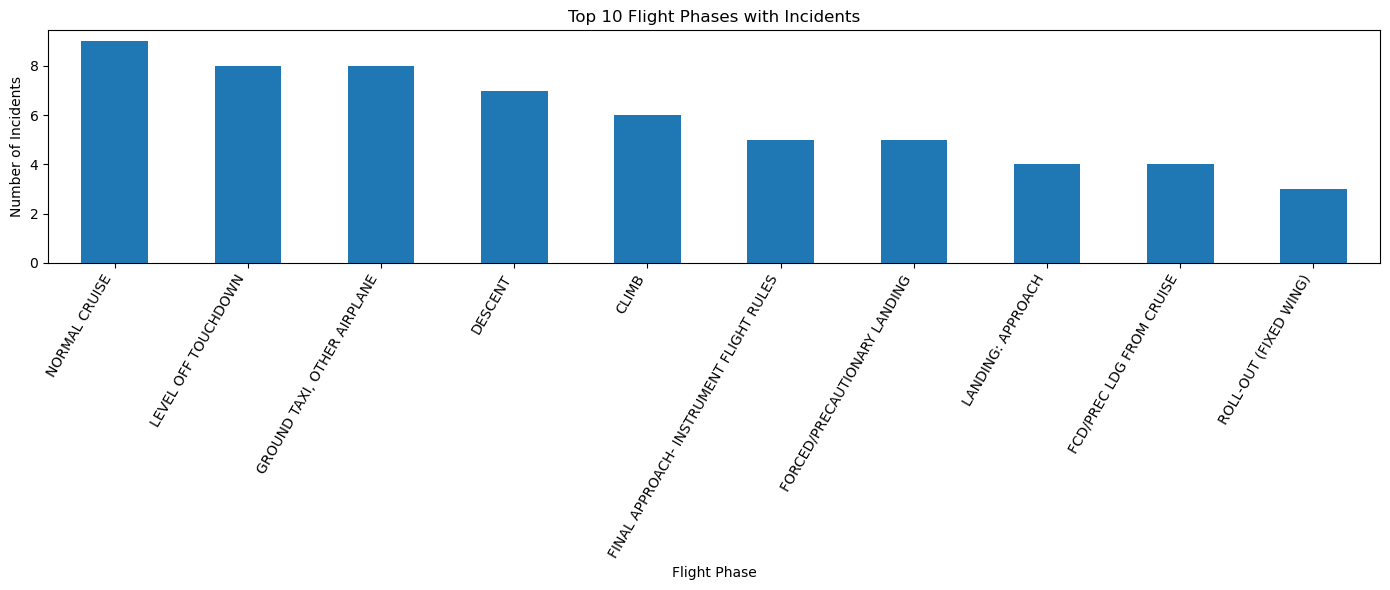

In [37]:
df['Flight Phase'].value_counts().nlargest(10).plot(kind='bar', figsize=(14, 6))
plt.title('Top 10 Flight Phases with Incidents')
plt.xlabel('Flight Phase')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=60, ha='right')  
plt.tight_layout()
plt.show()



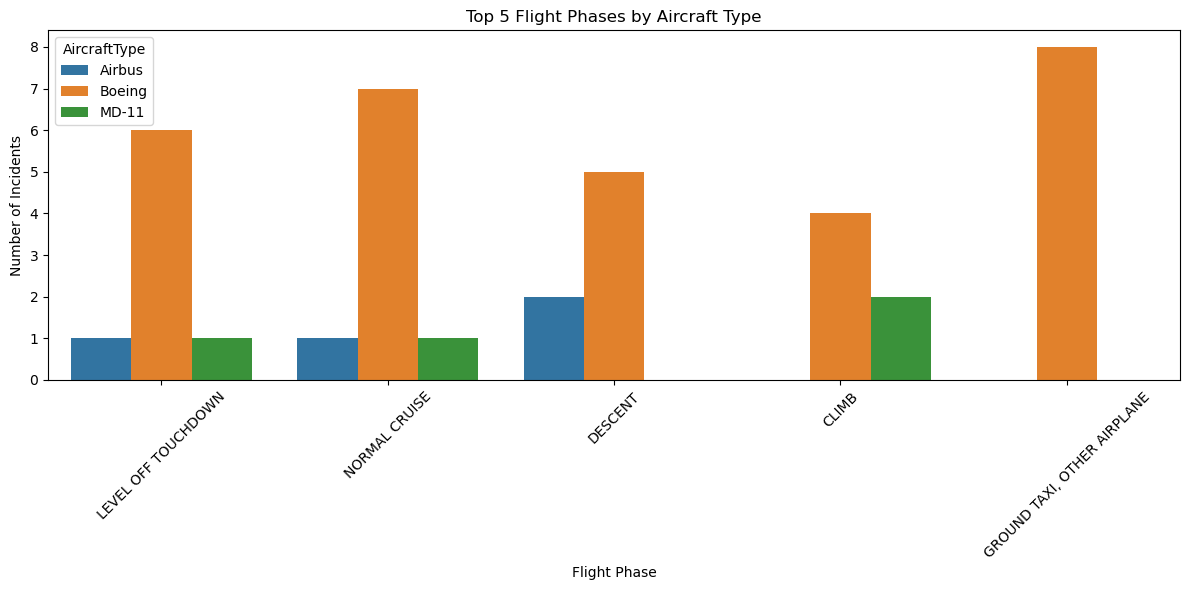

In [40]:
top_phases = df['Flight Phase'].value_counts().nlargest(5).index
filtered_df = df[df['Flight Phase'].isin(top_phases)]

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='Flight Phase', hue='AircraftType')
plt.title("Top 5 Flight Phases by Aircraft Type")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


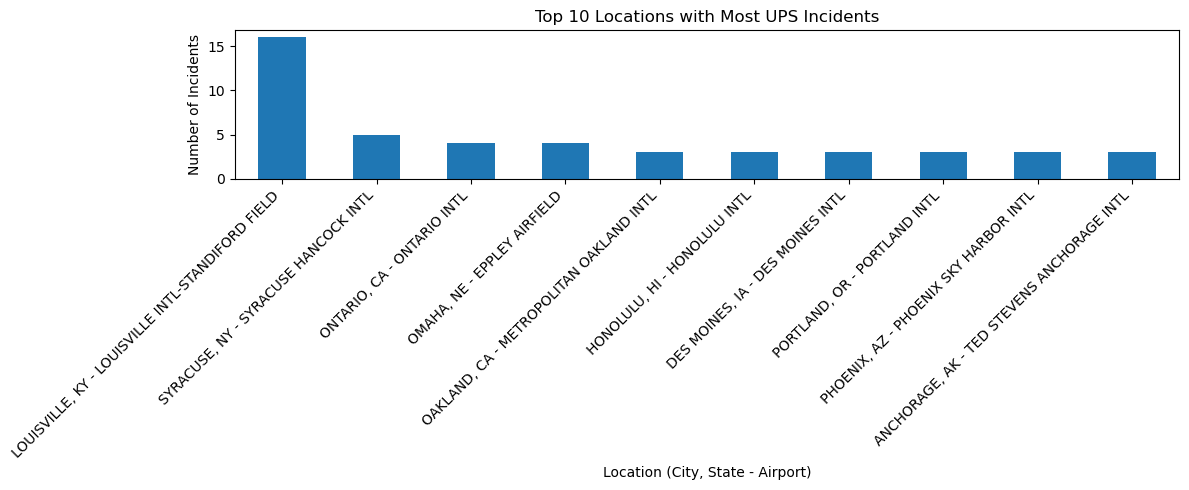

In [48]:
# Combine City, State, and Airport into one
df['Location'] = (
    df['Event City'].fillna('Unknown') + ", " +
    df['Event State'].fillna('Unknown') + " - " +
    df['Event Airport'].fillna('Unknown')
)

# Plot the top 10 locations
df['Location'].value_counts().nlargest(10).plot(
    kind='bar',
    figsize=(12, 5),
    title='Top 10 Locations with Most UPS Incidents'
)
plt.xlabel('Location (City, State - Airport)')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [20]:
print(df.columns)


Index(['AIDS Report Number', 'Local Event Date', 'Event City', 'Event State',
       'Event Airport', 'Event Type', 'Aircraft Damage', 'Flight Phase',
       'Aircraft Make', 'Aircraft Model', 'Aircraft Series', 'Operator',
       'Primary Flight Type', 'Flight Conduct Code', 'Flight Plan Filed Code',
       'Aircraft Registration Nbr', 'Total Fatalities', 'Total Injuries',
       'Aircraft Engine Make', 'Aircraft Engine Model', 'Engine Group Code',
       'Nbr of Engines', 'PIC Certificate Type', 'PIC Flight Time Total Hrs',
       'PIC Flight Time Total Make-Model'],
      dtype='object')


## Analyzing UPS Incidents by Pilot Hours and Aircraft Type

In [50]:
def bucket_hours(hours):
    if pd.isna(hours):
        return 'Unknown'
    elif hours < 1000:
        return '<1k hrs'
    elif hours < 5000:
        return '1k–5k hrs'
    elif hours < 10000:
        return '5k–10k hrs'
    else:
        return '10k+ hrs'

df['Pilot Experience'] = df['PIC Flight Time Total Hrs'].apply(bucket_hours)


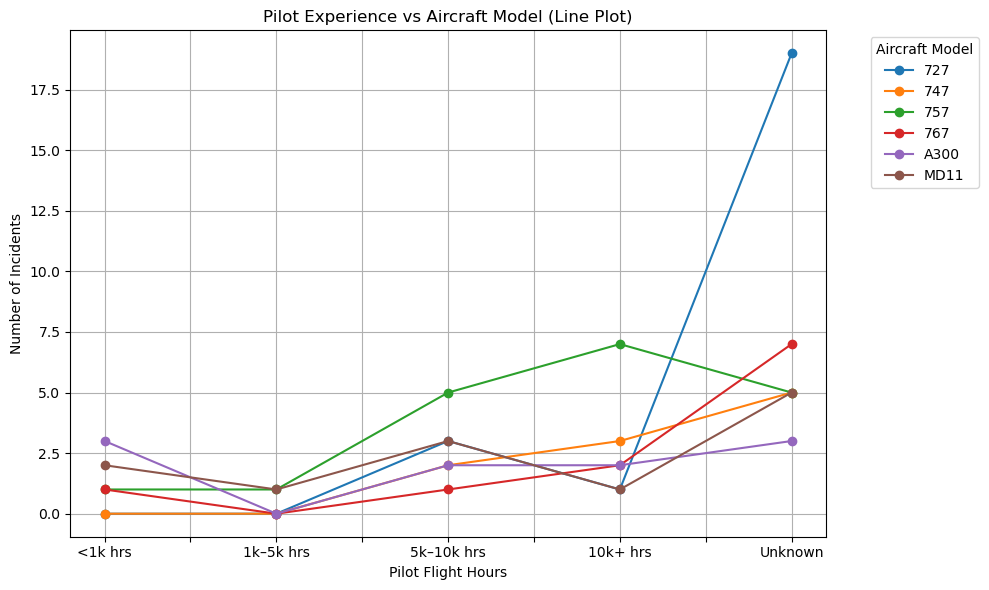

In [51]:
pilot_model_ct = pd.crosstab(
    df['Pilot Experience'], 
    df['Aircraft Model']
)

pilot_model_ct = pilot_model_ct.reindex(['<1k hrs', '1k–5k hrs', '5k–10k hrs', '10k+ hrs', 'Unknown'])

#line 
pilot_model_ct.plot(
    kind='line', 
    marker='o', 
    figsize=(10, 6), 
    title='Pilot Experience vs Aircraft Model (Line Plot)'
)

plt.xlabel('Pilot Flight Hours')
plt.ylabel('Number of Incidents')
plt.legend(title='Aircraft Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# sqlite


In [55]:
import sqlite3
conn = sqlite3.connect('./data/flight_risk.db')  
cursor = conn.cursor()


In [57]:
# Incident information
incidents_df = df[['AIDS Report Number', 'Local Event Date', 'Event State', 'Event Airport', 
                            'Event Type', 'Total Fatalities', 'Total Injuries', 'Flight Phase']].dropna()

# Aircraft details
aircraft_df = df[['AIDS Report Number', 'Aircraft Make', 'Aircraft Model', 'AircraftType']].dropna()


In [58]:
# Save both DataFrames to the database
incidents_df.to_sql('incidents', conn, if_exists='replace', index=False)
aircraft_df.to_sql('aircraft_info', conn, if_exists='replace', index=False)


85

In [59]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS aircraft_info_clean (
    "AIDS Report Number" TEXT PRIMARY KEY,
    "Aircraft Make" TEXT,
    "Aircraft Model" TEXT,
    "AircraftType" TEXT
)
''')

aircraft_df.to_sql('aircraft_info_clean', conn, if_exists='append', index=False)


85

In [60]:
query = '''
SELECT 
    i."AIDS Report Number", 
    i."Event State", 
    i."Event Type", 
    i."Flight Phase", 
    a."Aircraft Model", 
    a."AircraftType"
FROM 
    incidents i
JOIN 
    aircraft_info a
ON 
    i."AIDS Report Number" = a."AIDS Report Number"
'''

joined_df = pd.read_sql_query(query, conn)


In [61]:
conn.close()
